In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyemma

In [2]:
embd = np.load('embeddings.npz')['arr_0']

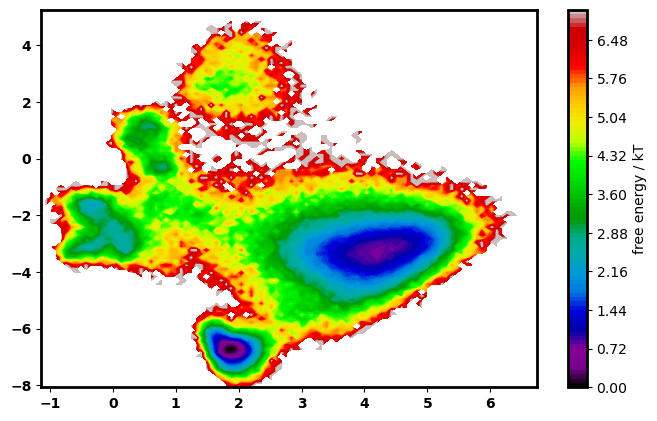

In [3]:
from pylab import *
rc('axes', linewidth=2)
f, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
pyemma.plots.plot_free_energy(embd[:,0], embd[:,1],ax=ax)

fontsize = 10
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.savefig('trpcage_free_energy.png')

In [4]:
transformed = []
for i in range(1,2):
    trans_temp = []
    trans_temp.append(np.load('trans_'+str(i)+'.npz')['arr_0'])
    transformed.append(trans_temp) 

In [5]:
y_m_t = []
inds = []
thresh = 0.95
exp = 0
for i in range(1):
    tmp = []
    tmp_ind = []
    for j in range(len(transformed[exp][i])):
        if transformed[exp][i][j].max()>thresh:
            tmp.append(np.argmax(transformed[exp][i][j]))
            tmp_ind.append(j)
    tmp = np.array(tmp)
    tmp_ind = np.array(tmp_ind)
        
    y_m_t.append(tmp)
    inds.append(tmp_ind)

In [6]:
inds

[array([     0,      1,      2, ..., 208797, 208798, 208799])]

In [7]:
my_dict = {0:0, 1:2, 2:1, 3:3, 4:4}

In [8]:
y_m_t_t = np.vectorize(my_dict.get)(y_m_t[0])

<Figure size 432x288 with 0 Axes>

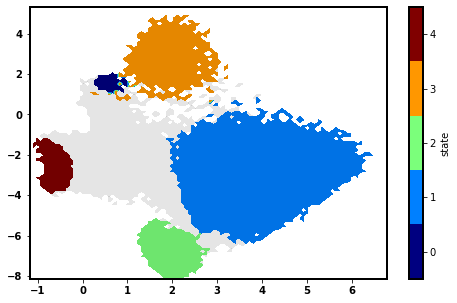

In [10]:
from pylab import *
plt.set_cmap('jet')
rc('axes', linewidth=2)
f, ax = plt.subplots(1,1, figsize=(8,5))
pyemma.plots.plot_state_map(embd[inds[0],0], embd[inds[0],1], y_m_t_t, ax=ax, ncontours=100)

fontsize = 10
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    

pyemma.plots.plot_state_map(embd[:,0], embd[:,1], np.zeros(embd[:,0].shape[0]), ax=ax, alpha=0.1, mask=True, cbar=False,cmap='Greys')
plt.savefig('trpcage_states.png')